In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
fileName = "KOLabels.csv"
df = pd.read_csv(fileName)
df2018 = df[:53]
df2019 = df[53:]

In [3]:
X_train = df2018[['Mean','SD']]
y_train = np.array(df2018['Label'])

In [4]:
#Question 1
print('Question 1')
bestT = 0
bestD = 0
bestAcc = 0
errors = []
for trees in range(1,10):
    dErrors = []
    for depth in range(1,5):
        clf = RandomForestClassifier(n_estimators = trees, max_depth=depth, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(df2019[['Mean', 'SD']])
        y_true = np.array(df2019['Label'])
        yAcc = accuracy_score(y_true, y_pred)
        dErrors.append(yAcc)
        if yAcc > bestAcc:
            bestT= trees
            bestD = depth
    errors.append(dErrors)


Question 1


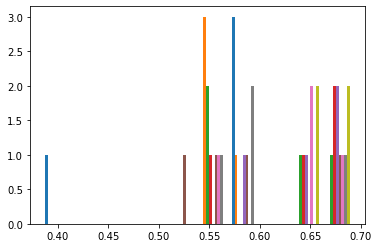

In [5]:
plt.hist(errors)
plt.show()

In [6]:
print('Best value of n = ',bestT)
print('Best value of d = ',bestD)

Best value of n =  9
Best value of d =  4


In [7]:
#Question 2
print('Question 2')
clf = RandomForestClassifier(n_estimators = bestT, max_depth=bestD, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(df2019[['Mean', 'SD']])

cf = confusion_matrix(df2019['Label'], y_pred)

print(cf)

Question 2
[[15  9]
 [ 9 19]]


In [8]:
print('\nQuestion 3')
tn, fp, fn, tp  = cf.ravel()
print('True positive rate =',round(tp/len(df2019)*100,2),'%')
print('True negative rate =',round(tn/len(df2019)*100,2),'%')



Question 3
True positive rate = 36.54 %
True negative rate = 28.85 %


In [9]:
#Question 4
print('\nQuestion 4')
df2019New = df2019
df2019New['Label'] = y_pred

closeValues = df2019[['Close']].values
buyHold = closeValues[0]- closeValues[-1] * 100

# label trade
position = None
money = 100
shares = 0
totalBalance = 0
for index, row in df2019New.iterrows():
    label = row['Label']
    if label == 'Good':
        if position == None:
            shares = money / float(row['Close'])
            position = 'Hold'
    else:
        if position == 'Hold':
            money = shares * float(row['Close'])
            position = None

    totalBalance += money

totalBalance += shares * float(df2019New[-1:]['Close'])

print('Buy and Hold profit = ',buyHold)
print('Trading based on new labels =',totalBalance-100)

if buyHold > (totalBalance-100):
    print('Use Buy and hold')

else:
    print('Use Random forest labels')


Question 4
Buy and Hold profit =  [-5487.43]
Trading based on new labels = 5229.6694558888785
Use Random forest labels


c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
